# Ford Gobike System Data Analysis
In this project i analysed the  fordgobike datasets and explored the information about the rides made by individuals  made in the month february 2019.  for this analysis , pandas DataFrame were used. The following questions were answered during this project:
* Which of the day of week were most of the trips made.
* the number of user type
* How was the gender distributed.
* Was there any round trip etc.


## Dataset Overview
The datasets consists of information regarding about 183,412 rides made in the month of february.The datasets consists of about 16 features which includes the following:

* duration_sec : duration of trip made in seconds
* start_time : time trip started
* end_time : time trip ended.
* start_station_id: station id where trip started.
* end_station_id : station id where trip ended.
* start_station_latitude : the lattitude location of the station  where of the trip started
* end_station_latitude : latitude location of the station where the trip ended.
* end_station_longitude :longitude location of the station where the trip ended.
* start_station_latitude :longitude location of the station where the trip started.

* User_type : type of user(subscriber or customer)
* member_birth_year : Year which member were born
* member_gender : gender of member(male, female and other)
* bike_id : unique identifier of bike used for trips:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import iqr
sns.set_style('dark')
%matplotlib inline

## Data Wrangling

### Data Gathering

In [2]:
bike = pd.read_csv('201902-fordgobike-tripdata.csv')


### Assessing Data

In [3]:
bike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
156359,459,2019-02-06 08:01:12.4680,2019-02-06 08:08:51.5830,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,5442,Subscriber,1991.0,Female,No
65922,932,2019-02-20 09:00:16.4260,2019-02-20 09:15:48.9900,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,126.0,Esprit Park,37.761634,-122.390648,5400,Subscriber,1991.0,Male,No
7042,344,2019-02-28 09:27:20.9260,2019-02-28 09:33:05.5600,321.0,5th St at Folsom,37.780146,-122.403071,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6472,Subscriber,1983.0,Male,No
138127,629,2019-02-08 07:56:44.4950,2019-02-08 08:07:13.7390,58.0,Market St at 10th St,37.776619,-122.417385,81.0,Berry St at 4th St,37.775880,-122.393170,4924,Subscriber,1983.0,Male,No
76363,789,2019-02-19 08:18:03.4090,2019-02-19 08:31:12.8490,84.0,Duboce Park,37.769200,-122.433812,142.0,Guerrero Park,37.745739,-122.422140,5404,Subscriber,NaN,NaN,No


In [4]:
# To check the rows and columns of the dataset
bike.shape

(183412, 16)

From the above we can see that the dataset has about 16 features and about 183412 rides were made

In [5]:
#Datasets Info 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:

bike.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [7]:
# To check the number of missing values in each of the features
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Missing values were found in the following columns start_station_id, start_station_name,end_station_id, end_station_name,member_birth_year and member_gender.

In [8]:
bike['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
bike['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [10]:
# to check if there is duplicates in the datasets
len(bike[bike.duplicated()])

0

Duplicates were not found in  datasets.

In [11]:
max_duration=bike['duration_sec'].max()
max_duration

85444

In [12]:
bike[bike['duration_sec']==max_duration]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No


#### Quality Issue
* Missing records from the following columns('start_station_id','start_station_name','end_station_id','end_station_name','member_birth_year' and 'member_gender')
* Inaccurate datatypes for start_time,end_time,member_birth_year,start_id and end_id

### Data Cleaning
In this section i'll handle all the issues highlighted while assessing the data

In [13]:
#copy the data frame
bike_clean = bike.copy()

In [14]:
# remove all null values
bike_clean.dropna(inplace=True)

In [15]:
bike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [16]:
# change datatype frome string to dattetime
bike_clean['start_time']= pd.DatetimeIndex(bike_clean['start_time'])
bike_clean['end_time']= pd.DatetimeIndex(bike_clean['end_time'])

In [17]:
# change datatype from string to integer
bike_clean['member_birth_year']= bike_clean['member_birth_year'].astype('int64')
bike_clean['start_station_id']=bike_clean['start_station_id'].astype('int64')
bike_clean['end_station_id']=bike_clean['end_station_id'].astype('int64')

In [18]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [19]:
bike_clean.drop(columns=['start_station_latitude','end_station_latitude'],inplace=True)

In [20]:
bike_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_longitude,end_station_id,end_station_name,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),-122.400811,13,Commercial St at Montgomery St,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,-122.426826,3,Powell St BART Station (Market St at 4th St),-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,-122.446546,70,Central Ave at Fell St,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,-122.271738,222,10th Ave at E 15th St,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,-122.391198,323,Broadway at Kearny,-122.405950,5200,Subscriber,1959,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,-122.391865,324,Union Square (Powell St at Post St),-122.408531,4832,Subscriber,1996,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),-122.400811,66,3rd St at Townsend St,-122.392741,4960,Subscriber,1984,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,-121.904888,277,Morrison Ave at Julian St,-121.908586,3824,Subscriber,1990,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,-122.273422,216,San Pablo Ave at 27th St,-122.275698,5095,Subscriber,1988,Male,No


In [21]:
bike_clean.shape

(174952, 14)

## Feature Engineering

In [22]:
#Extract the year from the start_time column
bike_clean['start_year']= bike_clean['start_time'].dt.year
#Extract the month in words from the start_time column
bike_clean['start_month']=bike_clean['start_time'].dt.month_name()
# Extract the day of the week from the start_time column
bike_clean['start_day_of_week']=bike_clean['start_time'].dt.day_name()
# Extract the hour from the start_time column
bike_clean['start_hour']= bike_clean['start_time'].dt.hour
# Extract day from the start_time column
bike_clean['day']=bike_clean['start_time'].dt.day

In [23]:
# To find the Aage of member
bike_clean['member_age']=bike_clean['start_year']-bike_clean['member_birth_year']

#### To find which of the trips is a round trip

In [24]:

def round_trip(x):
    '''
        Parameters
            Returns two strings
                Yes: if the start_station_id is similarto that of the end_station_id
                No : if the the start_station_id is not similar to that of en_station_id
    
    '''
    if x['start_station_id']== x['end_station_id']:
        return 'Yes'
    else:
        return 'No'
bike_clean['is_round_trip']= bike_clean.apply(round_trip,axis=1)
        
    
      

In [25]:
bike_clean['start_hour'].unique()

array([17, 12, 23, 22, 21, 18, 20, 19, 10, 15, 16,  9, 11,  0, 13, 14,  8,
        7,  5,  6,  4,  3,  2,  1], dtype=int64)

In [26]:
def age_group(x):
    '''
        Parameters
            Returns tree strings
                Young adults : If the age of the members falls with the range of 18 and less than 36
                Middle-age Adults: If the age of members falls within the range of 36 and less than 60
                Old Adults :if the age of members is from 60 and above 
    
    '''
    
    if x['member_age'] >=18  and x['member_age'] <36:
        return 'Young Adults'
    elif x['member_age'] >=36 and x['member_age'] < 60:
        return 'Middle-age Adults'
    else:
        return 'Old Adults'
bike_clean['age_group']= bike_clean.apply(age_group,axis=1)  

In [27]:
a = 0
b =12
c= 18

def morning_noon_night(x):
    if x['start_hour'] >= 0 and x['start_hour'] <12:
        return 'morning'
    elif x['start_hour'] >=12 and x['start_hour'] < 18:
        return 'noon'
    else:
        return 'night'
bike_clean['time_of_day']= bike_clean.apply(morning_noon_night,axis=1)

In [28]:
bike_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_longitude,end_station_id,end_station_name,end_station_longitude,bike_id,...,bike_share_for_all_trip,start_year,start_month,start_day_of_week,start_hour,day,member_age,is_round_trip,age_group,time_of_day
140905,389,2019-02-07 18:32:45.477,2019-02-07 18:39:15.219,58,Market St at 10th St,-122.417385,110,17th & Folsom Street Park (17th St at Folsom St),-122.415204,5114,...,No,2019,February,Thursday,18,7,32,No,Young Adults,night
83091,104,2019-02-18 08:18:36.591,2019-02-18 08:20:20.852,137,Jersey St at Castro St,-122.433950,138,Jersey St at Church St,-122.427411,4614,...,No,2019,February,Monday,8,18,31,No,Young Adults,morning
31141,131,2019-02-24 17:35:24.410,2019-02-24 17:37:35.555,50,2nd St at Townsend St,-122.390288,66,3rd St at Townsend St,-122.392741,4824,...,No,2019,February,Sunday,17,24,31,No,Young Adults,noon
168217,537,2019-02-04 15:55:37.240,2019-02-04 16:04:34.710,22,Howard St at Beale St,-122.394643,30,San Francisco Caltrain (Townsend St at 4th St),-122.395282,5332,...,No,2019,February,Monday,15,4,38,No,Middle-age Adults,noon
126533,954,2019-02-10 18:20:53.893,2019-02-10 18:36:48.045,120,Mission Dolores Park,-122.426435,285,Webster St at O'Farrell St,-122.431158,5526,...,No,2019,February,Sunday,18,10,25,No,Young Adults,night
9358,767,2019-02-28 07:17:18.588,2019-02-28 07:30:06.576,4,Cyril Magnin St at Ellis St,-122.408915,25,Howard St at 2nd St,-122.397405,4810,...,No,2019,February,Thursday,7,28,20,No,Young Adults,morning
80435,1284,2019-02-18 15:23:53.573,2019-02-18 15:45:17.663,17,Embarcadero BART Station (Beale St at Market St),-122.397086,62,Victoria Manalo Draves Park,-122.406432,6476,...,No,2019,February,Monday,15,18,40,No,Middle-age Adults,noon
126673,1189,2019-02-10 17:50:18.812,2019-02-10 18:10:08.224,377,Fell St at Stanyan St,-122.453704,34,Father Alfred E Boeddeker Park,-122.412408,5000,...,No,2019,February,Sunday,17,10,39,No,Middle-age Adults,noon
61725,788,2019-02-20 17:24:16.333,2019-02-20 17:37:24.538,66,3rd St at Townsend St,-122.392741,112,Harrison St at 17th St,-122.413004,5422,...,No,2019,February,Wednesday,17,20,21,No,Young Adults,noon
88869,227,2019-02-16 17:08:56.433,2019-02-16 17:12:43.944,89,Division St at Potrero Ave,-122.407646,336,Potrero Ave and Mariposa St,-122.407377,4759,...,No,2019,February,Saturday,17,16,32,No,Young Adults,noon


In [29]:
# convert duration to minutes

bike_clean['duration_min']= bike_clean['duration_sec'] / 60

In [30]:
bike_clean['is_round_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
bike_clean['start_year'].unique()

array([2019], dtype=int64)

In [32]:
bike_clean.to_csv('bike_clean.csv')

## Data Visualisation

### Univirate Exploration

#### How are the  trip Duration Distributed?

In [33]:
bike_clean['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

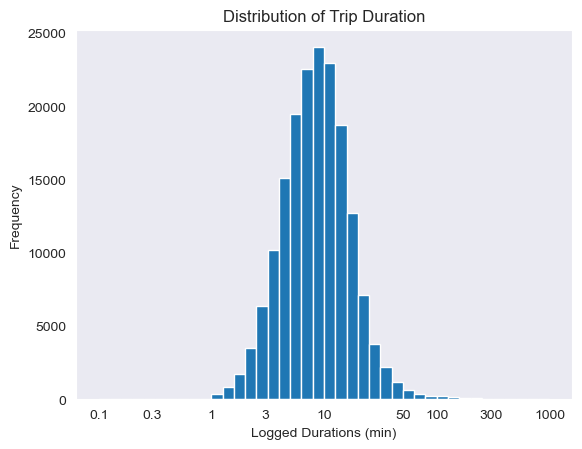

In [34]:
bins = 10 ** np.arange(-1,3+0.1,0.1)
ticks = [0.1,0.3,1,3,10,50,100,300,1000]
## convert to ticks to strings
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=bike_clean,x='duration_min',bins=bins)
plt.title('Distribution of Trip Duration')

plt.xlabel('Logged Durations (min)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.xticks(ticks,labels)
plt.show()

from the histplot we could see that after the trip duration was plotted on a logged scale, the  duration distribution looks unimodal with most of the trip concentrated around 10 minutes.  

#### Which day in the week was most trips made.

In [35]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


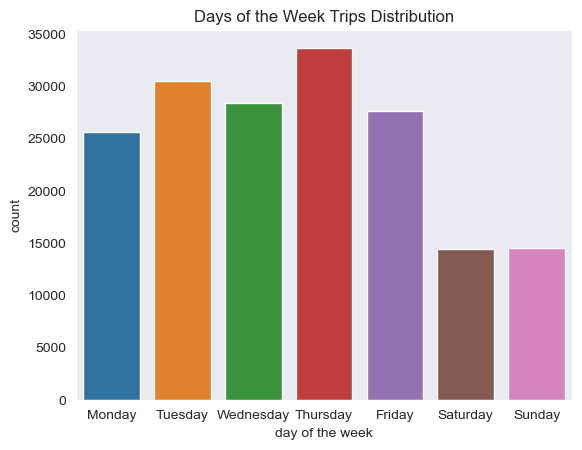

In [36]:
sns.countplot(data=bike_clean,x='start_day_of_week',order=day_order)
plt.xlabel('day of the week')
plt.title('Days of the Week Trips Distribution')
plt.show()

From the above countplot, most of the trips were made on Thursday while there was low patronage during the weekend.

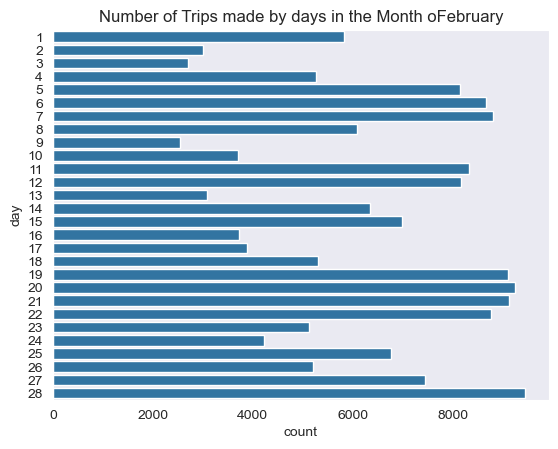

In [37]:
plt.figure(dpi=100)
base_color =sns.color_palette()[0]
sns.countplot(data=bike_clean,y='day',color=base_color)
plt.title('Number of Trips made by days in the Month oFebruary')
plt.show()

In [38]:
time_of_day_counts=bike_clean['time_of_day'].value_counts(normalize=True)
time_of_day_counts

morning    0.385340
noon       0.383065
night      0.231595
Name: time_of_day, dtype: float64

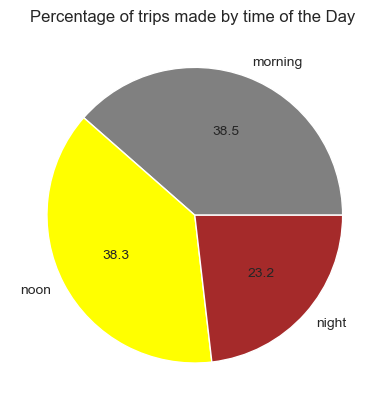

In [39]:
plt.pie(data=time_of_day_counts,
        labels=time_of_day_counts.index,
        x=time_of_day_counts.values,
       autopct='%1.1f',
       colors=['grey','yellow','brown'])
plt.title('Percentage of trips made by time of the Day ')
plt.show()

From the piechart we could that majority of the trips were made during the day(morning and noon)

In [40]:
# create a function that plots a countplot
def plot_countplot(df,x,xlabel,title):
    sns.countplot(data=df, x=x)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

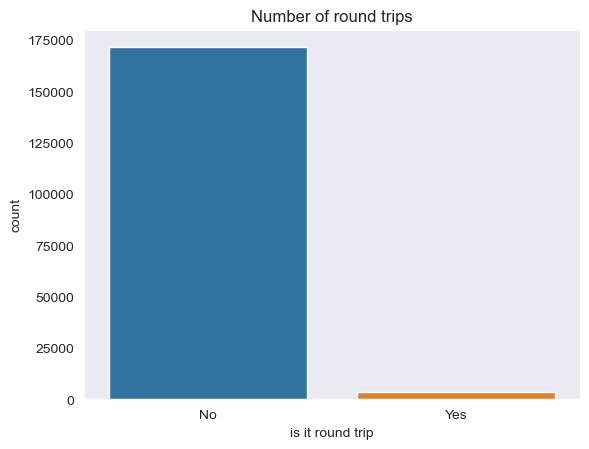

In [41]:
plot_countplot(bike_clean,'is_round_trip','is it round trip','Number of round trips')

From the countplot we could see that an overwhelming proportions of the trips made were not round tripFr

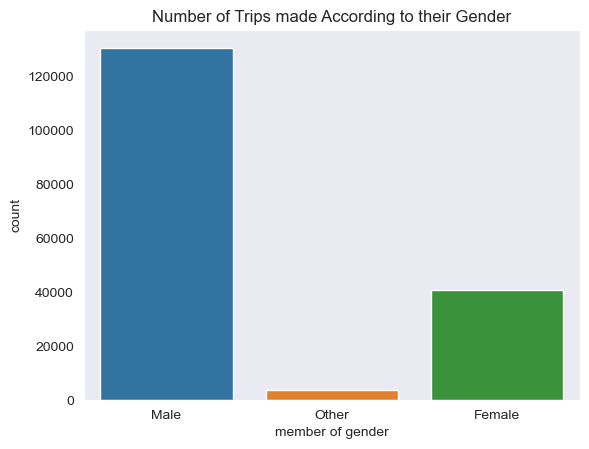

In [42]:
plot_countplot(bike_clean,'member_gender','member of gender','Number of Trips made According to their Gender')

from the above graph the male gender made the highest number of trips than the other genders.

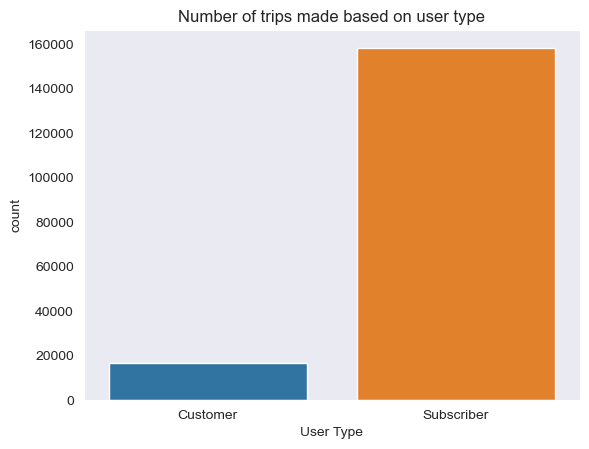

In [43]:
plot_countplot(bike_clean,'user_type','User Type', 'Number of trips made based on user type')

From the above countplot most of the trips made were from subscribers.

In [44]:
bike_clean['age_group'].value_counts()

Young Adults         114024
Middle-age Adults     56774
Old Adults             4154
Name: age_group, dtype: int64

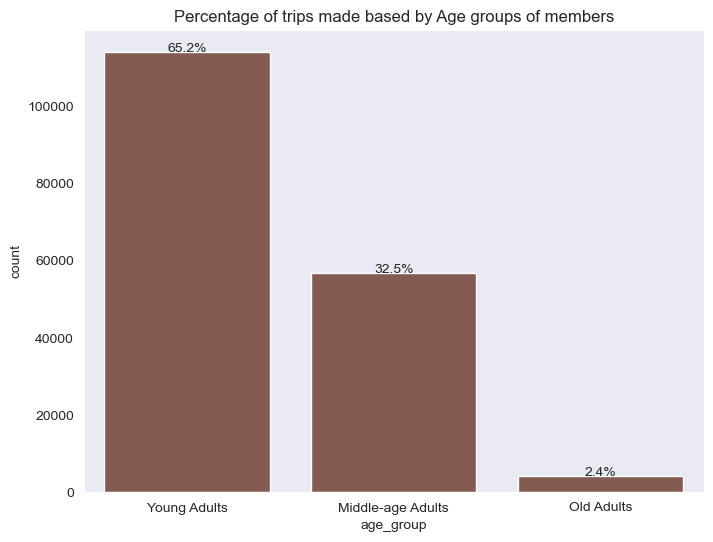

In [45]:
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[5]
sns.countplot(data=bike_clean,x='age_group',color=base_color)
n_points = bike_clean.shape[0]
age_group_counts=bike_clean['age_group'].value_counts()
locs,labels= plt.xticks()
for loc,label in zip(locs,labels):
    count= age_group_counts[label.get_text()]
    pct_string ='{:0.1f}%'.format(100 * count/n_points)
    plt.text(loc,count-8,pct_string,ha='center')
    plt.title('Percentage of trips made based by Age groups of members')
    
plt.show()

About 65% of the trips were made by young adult which are members within the age of 18 and 35 years.

### BiViRate Exploration

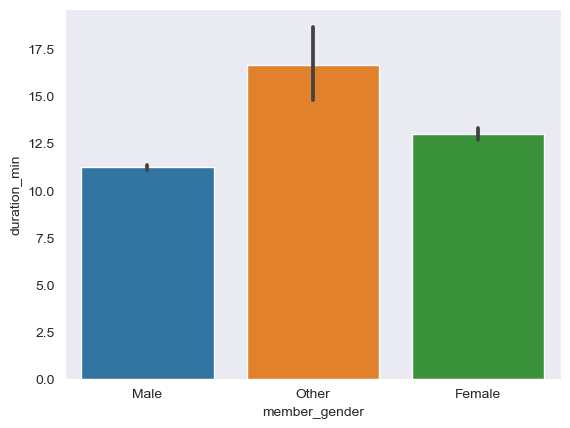

In [46]:
sns.barplot(data=bike_clean, x='member_gender',y='duration_min')

plt.show()

The barplot shows the other other gender which does not include male and female has the highest average duration. This could bre partly down to the fact that section of gender made the least number of trips.

In [47]:
day_count=bike_clean.groupby(['day','time_of_day']).size().reset_index().rename(columns={0:'count'})

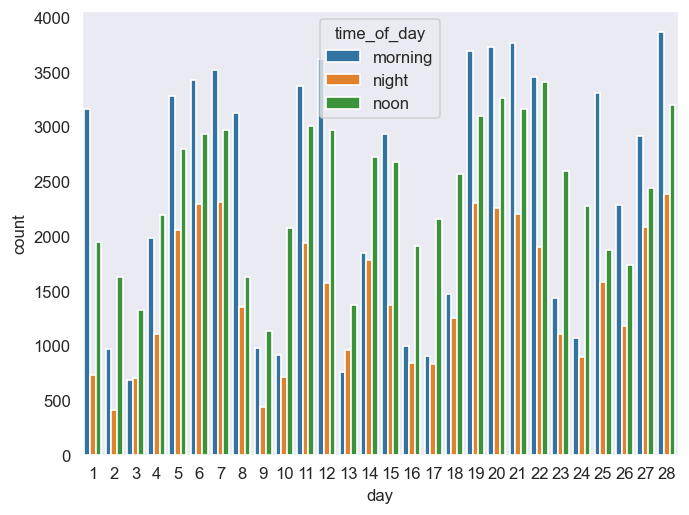

In [48]:
plt.figure(dpi=120)
sns.barplot(data=day_count,x='day',y='count',hue='time_of_day')
plt.show()

From the above barplot , we could  see that in the month of february most of trips were made in the month of February except for few exceptions.

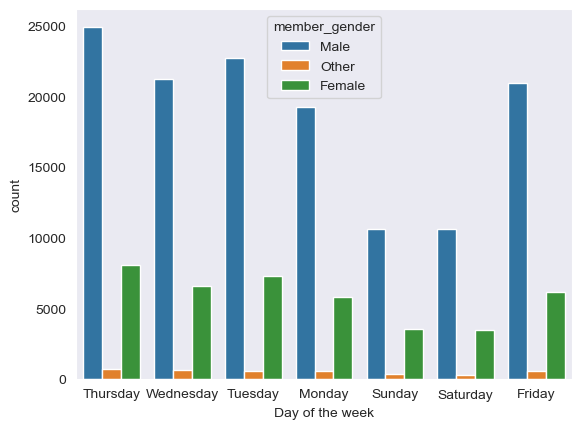

In [49]:
sns.countplot(data=bike_clean, x='start_day_of_week',hue='member_gender')
plt.xlabel('Day of the week')
plt.show()

From the above countplot, the male gender made the most number of trips through out the week.

In [50]:
bike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_year', 'start_month', 'start_day_of_week', 'start_hour', 'day',
       'member_age', 'is_round_trip', 'age_group', 'time_of_day',
       'duration_min'],
      dtype='object')

In [51]:
day_hour_count = bike_clean.groupby(['start_day_of_week','start_hour']).size().reset_index().rename(columns={0:'count'})
day_hour_count

,start_day_of_week,start_hour,count
0,Friday,0,144
1,Friday,1,79
2,Friday,2,63
3,Friday,3,29
4,Friday,4,42
...,...,...,...
163,Wednesday,19,1783
164,Wednesday,20,1147
165,Wednesday,21,868
166,Wednesday,22,507


In [52]:
heat=day_hour_count.pivot(index='start_hour',columns='start_day_of_week',values='count')

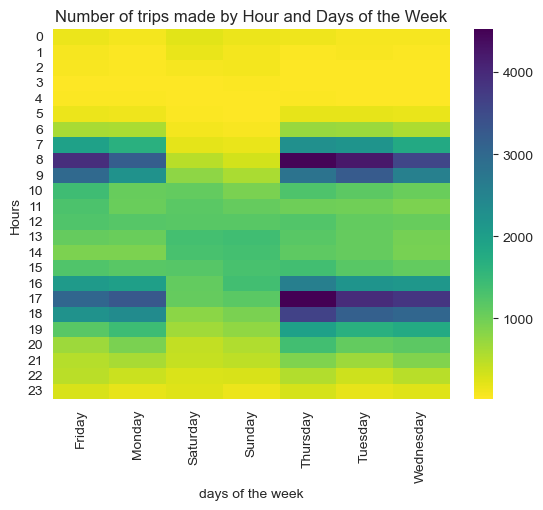

In [53]:
sns.heatmap(data=heat,cmap='viridis_r')
plt.title('Number of trips made by Hour and Days of the Week')
plt.ylabel('Hours')
plt.xlabel('days of the week')
plt.show()

from the above heatmap, we could see that most of trips were made between 7am and 9am and rapidly declines from 10am to 16 in the evening. This could be partly down to the fact that most of their have busy schedules during that time of the day. For much of the evening ie between from 17 to 18, activitiees pick-ups as most of their customers returns from work.

<AxesSubplot:xlabel='duration_min', ylabel='member_gender'>

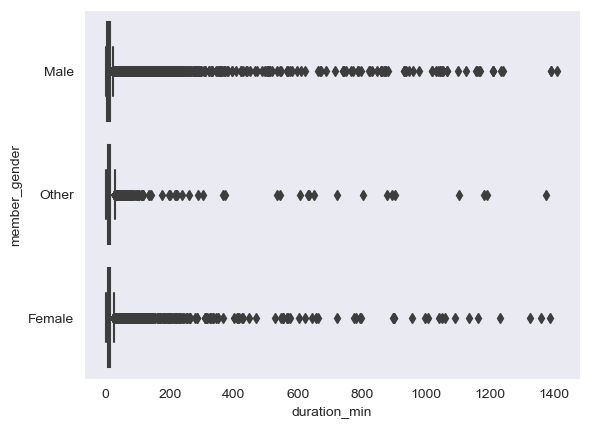

In [54]:
sns.boxplot(data=bike_clean,x='duration_min',y='member_gender' )

The above box plot was marred by outliers and as such those ouliers needs to be removed.

In [55]:
# create a function to remove outliers.
def remove_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    
    q3=np.quantile(df[col],0.75)
    IQR= iqr(df[col])
    
    lower = (q1) - 1.5 * IQR
    upper = (q3) + 1.5 * IQR
    
    result = df[~((df[col]  < lower)|(df[col] >upper))]
    return result

In [56]:
df=bike_clean[['member_gender','duration_min']]

In [57]:
result_df = remove_outliers(df,'duration_min')

In [58]:
result_df

,member_gender,duration_min
6,Female,19.116667
9,Male,17.483333
10,Female,7.633333
11,Male,8.433333
12,Male,19.600000
...,...,...
183407,Male,8.000000
183408,Male,5.216667
183409,Male,2.350000
183410,Male,2.316667


<AxesSubplot:xlabel='duration_min', ylabel='member_gender'>

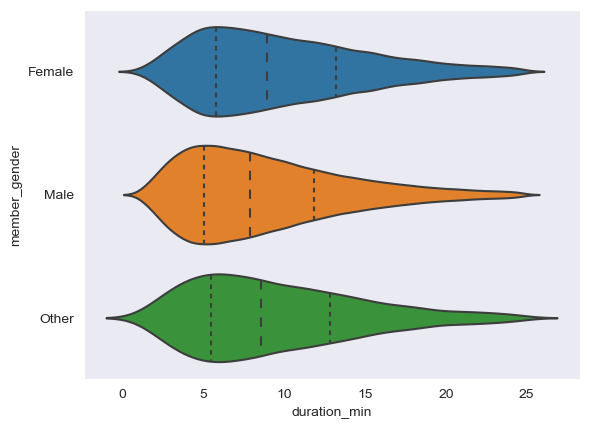

In [59]:
sns.violinplot(data=result_df,x='duration_min',y='member_gender' ,inner='quartile')

After the removing outliers we could see that both female and other gender made trips with median minutes of about 8 minutes.

### MultiVirate Exploration

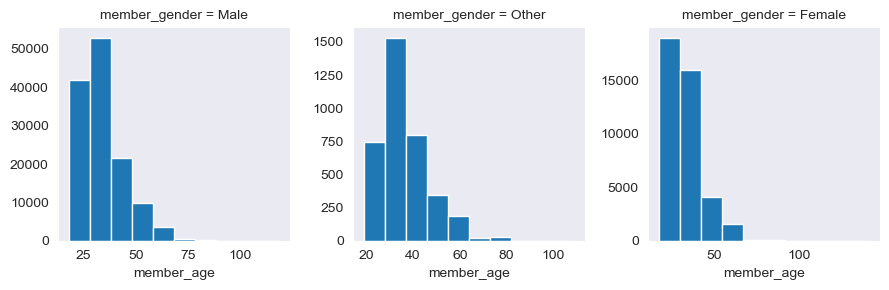

In [60]:
g=sns.FacetGrid(data=bike_clean,col='member_gender',sharey=False,sharex=False)
g.map(plt.hist,'member_age')

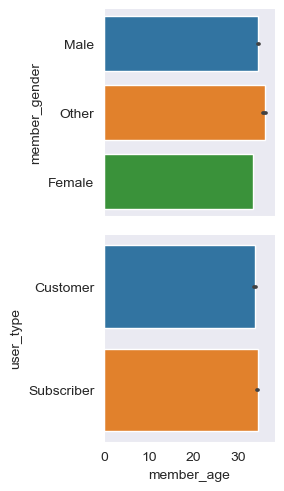

In [61]:
g = sns.PairGrid(data=bike_clean, x_vars='member_age', y_vars=['member_gender','user_type'],diag_sharey=False)
g.map(sns.barplot)
plt.show()

The above plot depicts  that bothe the customer and subscribers of Ford GoBike similar average age while on the otherhand other gender has a higher average age than both the female and male gender.

In [62]:
day_hour_duration = bike_clean.groupby(['start_day_of_week','start_hour'])['duration_min'].mean().reset_index().rename(columns={'duration_min':'avg_duration'})
day_hour_duration

,start_day_of_week,start_hour,avg_duration
0,Friday,0,11.159491
1,Friday,1,11.737553
2,Friday,2,11.712698
3,Friday,3,9.690230
4,Friday,4,13.531746
...,...,...,...
163,Wednesday,19,10.760946
164,Wednesday,20,12.356670
165,Wednesday,21,9.457220
166,Wednesday,22,9.695595


In [63]:
day_hour_duration_pivot=day_hour_duration.pivot(index='start_hour',columns='start_day_of_week',values='avg_duration')

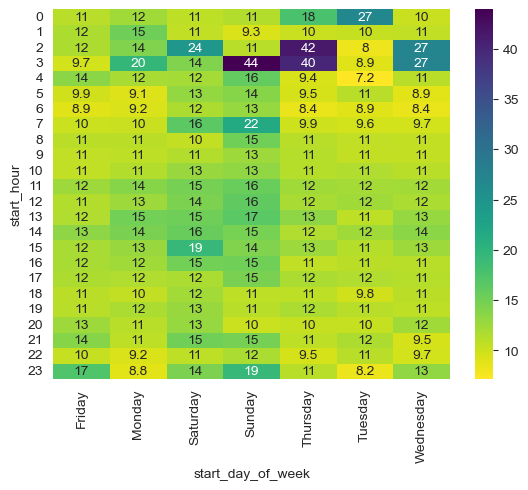

In [64]:
plt.figure(dpi=100)
sns.heatmap(data=day_hour_duration_pivot,annot=True,cmap='viridis_r')
plt.show()

From the above heatmap, we could see that they made their highest average distance on by early hours of 3 on Sunday.

### Conclusion
from the above analysis we arrive at the following conclusion:
* The male gender made the most trips in the month of february.
* Most of the trips made falls around 10 minutes.
* Majority of the trips made were not round trips.
* The age group of those who patronised ford Gobike were within the age range of 18 to 35 years hence the name young adults.
* Most of the trips made was were during the day time.
* Most of the trips were made on Thursday while there was low patronage during the weekend.
